<a href="https://colab.research.google.com/github/peterzk/Group-6-Project/blob/master/Insights_Supermarket_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **CONSUMER SPENDING IN KENYAN SUPERMARKETS**

> #### Project by **The Insights**




# Defining the Question


### The analytical question

We will try toinvestigate a claim about customers spending on week days and during weekends using data collected across different supermarkets in Kenya

### Defining the metric for success

> During the process of trying to prove our hypothesis true or false we will carry out the following procedure.
As we try to prove whether our hypothesis is true or false,we will carry out the following procedures:

>> a) We will carry out univariate analysis where will plot pie charts and bar graphs to understand the data more.

>>  b)We will also plot pairplots to understand the relationship between variables during bivariate analysis.
We will also perfom a correlation analysis of our numeric and categorical variables.

>> c) We will carry out multivariate analysis using the discriminant analysis.  

>> d) We will perform tests that will help us confirm our hypothesis.

>> e) We will also perform a classification algorithm using the Bayes Theorem.



### Understanding the context

The objective of this analysis is to investigate consumer spending patterns in selected Kenyan supermarkets. We are interested in understanding how much consumers spend across different times of the week and for different product categories. Our claim is that consumers spend more money in supermarkets on the weekends as opposed to weekdays. As such, our hypothesis will be testing whether the average spending in supermarkets during weekdays is similar to the average spending during the weekends.


### Data relevance.

The data available for this study is suitable to carry out the analysis and provide the information required

# 1). Loading the Data

In [0]:
# Importing the necessary Python libraries.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [0]:
# Loading our dataset and creating a pandas dataframe.
#
url = "Supermarket Data.xlsx"
df = pd.read_excel(url)
df.columns

Index(['supermarket', 'no_of_items', 'variation', 'total', 'paid', 'change',
       'type', 'food', 'snack', 'beverage', 'consumables', 'high_end', 'asset',
       'fixed_asset', 'date', 'mall', 'time', 'time_type', 'type_market',
       'location', 'loc_category', 'day', 'day_type', '24hr', 'day.1', 'month',
       'year'],
      dtype='object')

In [0]:
# Getting the dataset information
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1463 non-null   object 
 1   no_of_items   1464 non-null   int64  
 2   variation     1464 non-null   int64  
 3   total         1464 non-null   float64
 4   paid          1464 non-null   float64
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

# 2). Checking the Data

In [0]:
# Previewing the top of our dataset
#
df.head()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
2,acacia,3,1,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
3,acacia,3,1,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
4,acacia,1,1,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0


In [0]:
# Previewing the bottom of our dataset
#
df.tail()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
1459,tuskys,4,3,1810.0,2000.0,190.0,cash,no,yes,no,yes,yes,no,no,2017-06-15 00:00:00,yes,11:28:00,morning,chain,greenspan,mid,Thursday,weekday,no,15,6,2017.0
1460,nakumatt,2,3,516.0,516.0,0.0,card,yes,no,yes,no,yes,no,no,2017-07-17 00:00:00,yes,21:00:00,night,chain,junction,mid,Monday,weekday,no,17,7,2017.0
1461,tuskys,2,1,290.0,500.0,210.0,cash,yes,no,no,no,no,no,no,2017-06-30 00:00:00,no,21:09:00,night,chain,cbd,mid,Sunday,weekend,no,30,6,2017.0
1462,tuskys,5,2,596.0,1000.0,404.0,cash,yes,no,no,yes,no,no,no,2017-05-08 00:00:00,yes,11:00:00,morning,chain,greenspan,mid,Monday,weekday,no,8,5,2017.0
1463,Eastmatt,2,2,120.0,2000.0,1880.0,cash,yes,yes,no,no,no,no,no,2017-06-23 00:00:00,no,16:51:00,evening,chain,cbd,mid,Friday,weekday,no,23,6,2017.0


In [0]:
# describing our data
#
df.describe()

,no_of_items,variation,total,paid,change,month,year
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1462.000000
mean,2.308743,1.398224,311.780847,469.251851,164.037316,8.961749,2015.911081
std,2.647746,0.731498,924.075390,951.768164,257.261144,74.312772,47.618482
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,201.000000
25%,1.000000,1.000000,60.000000,100.000000,5.000000,5.000000,2017.000000
50%,1.000000,1.000000,110.000000,200.000000,40.000000,6.000000,2017.000000
75%,3.000000,2.000000,250.000000,500.000000,191.000000,8.000000,2017.000000
max,33.000000,6.000000,17350.000000,17350.000000,1880.000000,2017.000000,2107.000000


# 3). Data Cleaning


In [0]:
# Determining the number of records in our dataset
#
df.shape

(1464, 27)

In [0]:
# Checking for duplicate values in the dataframe.
#
df.duplicated().values.any()

True

In [0]:
# Dropping our duplicate rows
#
df.drop_duplicates(inplace=True)

In [0]:
# Confirming that we do not have duplicate values
#
df.duplicated().values.sum()

0

In [0]:
# Checking the column names
#
# ----
df.columns

Index(['supermarket', 'no_of_items', 'variation', 'total', 'paid', 'change',
       'type', 'food', 'snack', 'beverage', 'consumables', 'high_end', 'asset',
       'fixed_asset', 'date', 'mall', 'time', 'time_type', 'type_market',
       'location', 'loc_category', 'day', 'day_type', '24hr', 'day.1', 'month',
       'year'],
      dtype='object')

In [0]:
# Checking for null values
#
# ----
df.isnull().values.any()

True

In [0]:
# Checking the total number of null values
#
# ----
#
df.columns
df.isnull().values.sum()

3

In [0]:
# Dropping the null values from our dataset
#
# -----
df.dropna(inplace=True)

In [0]:
# Confirming that there are no null values in our dataset
#
# ---- 
#
df.isnull().values.any()

False

## Checking for outliers

Outlier ranges for Taken Cars.
 [[22.0, 32.0, 33.0, 12.0, 9.0, 10.0, 7.0, 9.0, 7.0, 8.0, 14.0, 13.0, 8.0, 10.0, 10.0, 10.0, 7.0, 13.0, 8.0, 9.0, 12.0, 8.0, 7.0, 9.0, 16.0, 7.0, 7.0, 11.0, 7.0, 7.0, 13.0, 10.0, 12.0, 8.0, 11.0, 11.0, 8.0, 9.0, 15.0, 7.0, 10.0, 11.0, 16.0, 21.0, 8.0, 22.0, 7.0, 8.0, 13.0, 17.0, 14.0, 7.0, 7.0, 9.0, 21.0, 12.0, 9.0, 7.0, 10.0, 10.0, 9.0, 16.0, 18.0, 8.0, 11.0, 14.0], [6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0], [5611.0, 7955.0, 780.0, 13005.0, 1000.0, 2420.0, 4926.0, 5439.0, 8110.0, 584.0, 850.0, 680.0, 1245.0, 800.0, 736.0, 2903.0, 961.0, 907.0, 638.0, 720.0, 542.0, 1900.0, 580.0, 2183.0, 2657.0, 1724.0, 3585.0, 530.0, 600.0, 927.0, 1273.0, 835.0, 875.0, 3440.0, 780.0, 1141.0, 526.0, 750.0, 17350.0, 840.0, 590.0, 716.0, 1422.0, 590.0, 705.0, 785.0, 530.0, 658.0, 887.0, 692.0, 840.0, 557.0, 1876.0, 547.0, 612.0, 845.0, 566.0, 635.0, 1075.0, 823.0, 2304.0,

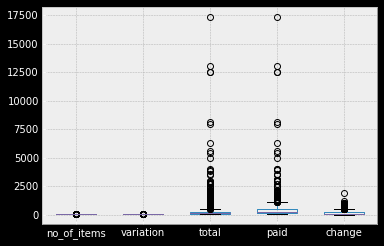

In [0]:
# OUTLIERS : Checking for Outliers by plotting a visual for the taken cars only.
# 
# ----
#
plt.style.use('bmh')

numerical_df = df[['no_of_items', 'variation', 'total', 'paid', 'change']]
_t, df_outliers = pd.DataFrame.boxplot(numerical_df, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]


print("Outlier ranges for Taken Cars.\n", out_liers)


In [0]:
# Fucntion for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [0]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numerical_df:
    rows, columns = numerical_df.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numerical_df[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

no_of_items has 28 outliers in total, which is 1.9% of data
variation has 29 outliers in total, which is 2.0% of data
total has 15 outliers in total, which is 1.0% of data
paid has 15 outliers in total, which is 1.0% of data
change has 18 outliers in total, which is 1.3% of data


* We determine that outliers do exist in our dataset.
* no_of_items has 28 outliers in total, which is 1.9% of data
* variation has 29 outliers in total, which is 2.0% of data
* total has 15 outliers in total, which is 1.0% of data
* paid has 15 outliers in total, which is 1.0% of data
* change has 18 outliers in total, which is 1.3% of data

In [0]:
# Droping ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numerical_df))
print(z)


[[0.49765968 0.54321072 0.23731897 0.38479417 0.59783479]
 [0.49765968 0.54321072 0.23731897 0.03465426 0.95690075]
 [0.268667   0.54321072 0.04294946 0.17506996 0.52009802]
 ...
 [0.11449634 0.54321072 0.02135285 0.03465426 0.17953298]
 [1.03499367 0.83298686 0.30907531 0.5589648  0.93357972]
 [0.11449634 0.83298686 0.20492405 1.60758588 6.67055387]]


In [0]:
# Confirming that our outliers have been dropped from the dataset.
#
df_o = numerical_df[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numerical_df.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 1439
New dataframe size: 1367


In [0]:
# Saving our Data without outliers
#
numerical_df.to_csv("Outliers_removed.csv")

# 4). Exploratory Data Analysis

> ## i) Univariate Analysis

In [0]:
# Loading our dataset and creating a dataframe.
# previewing our column names.
#
# ----
#
supermarket_df = pd.read_csv("Outliers_removed.csv")
supermarket_df.columns

Index(['Unnamed: 0', 'no_of_items', 'variation', 'total', 'paid', 'change'], dtype='object')

In [0]:
supermarket_df.shape[0]

1439

In [0]:
# Adding others variables to our clean dataframe
#
supermarket_df[['supermarket', 'type', 'food', 'snack', 'beverage','consumables','high_end', 'asset','fixed_asset','date','mall', 'time', 'time_type','type_market','location','loc_category', 'day', 'day_type', '24hr', 'day.1', 'month','year']]= df[['supermarket', 'type', 'food', 'snack', 'beverage','consumables','high_end', 'asset','fixed_asset','date','mall', 'time', 'time_type','type_market','location', 'loc_category', 'day', 'day_type', '24hr', 'day.1', 'month','year']]

supermarket_df.head()

,Unnamed: 0,no_of_items,variation,total,paid,change,supermarket,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,0,1,1,90.0,100.0,10.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
1,1,1,1,90.0,500.0,410.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
2,2,3,1,270.0,300.0,30.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
3,3,3,1,137.0,200.0,63.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
4,4,1,1,75.0,80.0,5.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0


In [0]:
# drawing frequency tables for our categorical data
#
categorical = supermarket_df[['supermarket','type', 'food', 'snack', 'beverage', 'consumables', 'high_end', 'asset',\
       'fixed_asset', 'date', 'mall', 'time', 'time_type', 'type_market','location', 'loc_category']]

for col in categorical:
    print(supermarket_df[col].value_counts())
    print("\n")


karrymart      510
tumaini        268
nakumatt       167
cleanshelf     124
tuskys         115
ukwala          52
acacia          51
naivas          29
eastmatt        26
Tuskys          16
Naivas          15
chandarana      12
uchumi           9
neema            4
zucchini         4
kamindi          3
fairway          2
Selfridges       2
interstrat       1
Eastmatt         1
magna            1
large neema      1
kassmart         1
Name: supermarket, dtype: int64


cash               1332
mpesa                50
card                 25
credit card           3
voucher               2
points                1
redeemed points       1
Name: type, dtype: int64


no     718
yes    696
Name: food, dtype: int64


no     951
yes    463
Name: snack, dtype: int64


no     937
yes    477
Name: beverage, dtype: int64


no     1108
yes     306
Name: consumables, dtype: int64


no     1335
yes      79
Name: high_end, dtype: int64


no     1278
yes     136
Name: asset, dtype: int64


no     1411
yes  

In [0]:
# Checking the shape of our new dataframe
#
supermarket_df.shape[0]

1439

In [0]:
# dropping null values
#
supermarket_df.dropna(inplace=True) 

In [0]:
# Creating a dataframe fr our categorcal variables
#
n_categorical = categorical[['supermarket', 'type', 'food', 'snack', 'beverage', 'consumables',\
                             'high_end', 'asset', 'fixed_asset', 'mall', 'time_type',\
                             'type_market', 'location', 'loc_category']]

In [0]:
# Checking for the total number of columns on our categorical dataframe
#
x = len(n_categorical.columns)
print(" Number of columns is: ", x)

 Number of columns is:  14


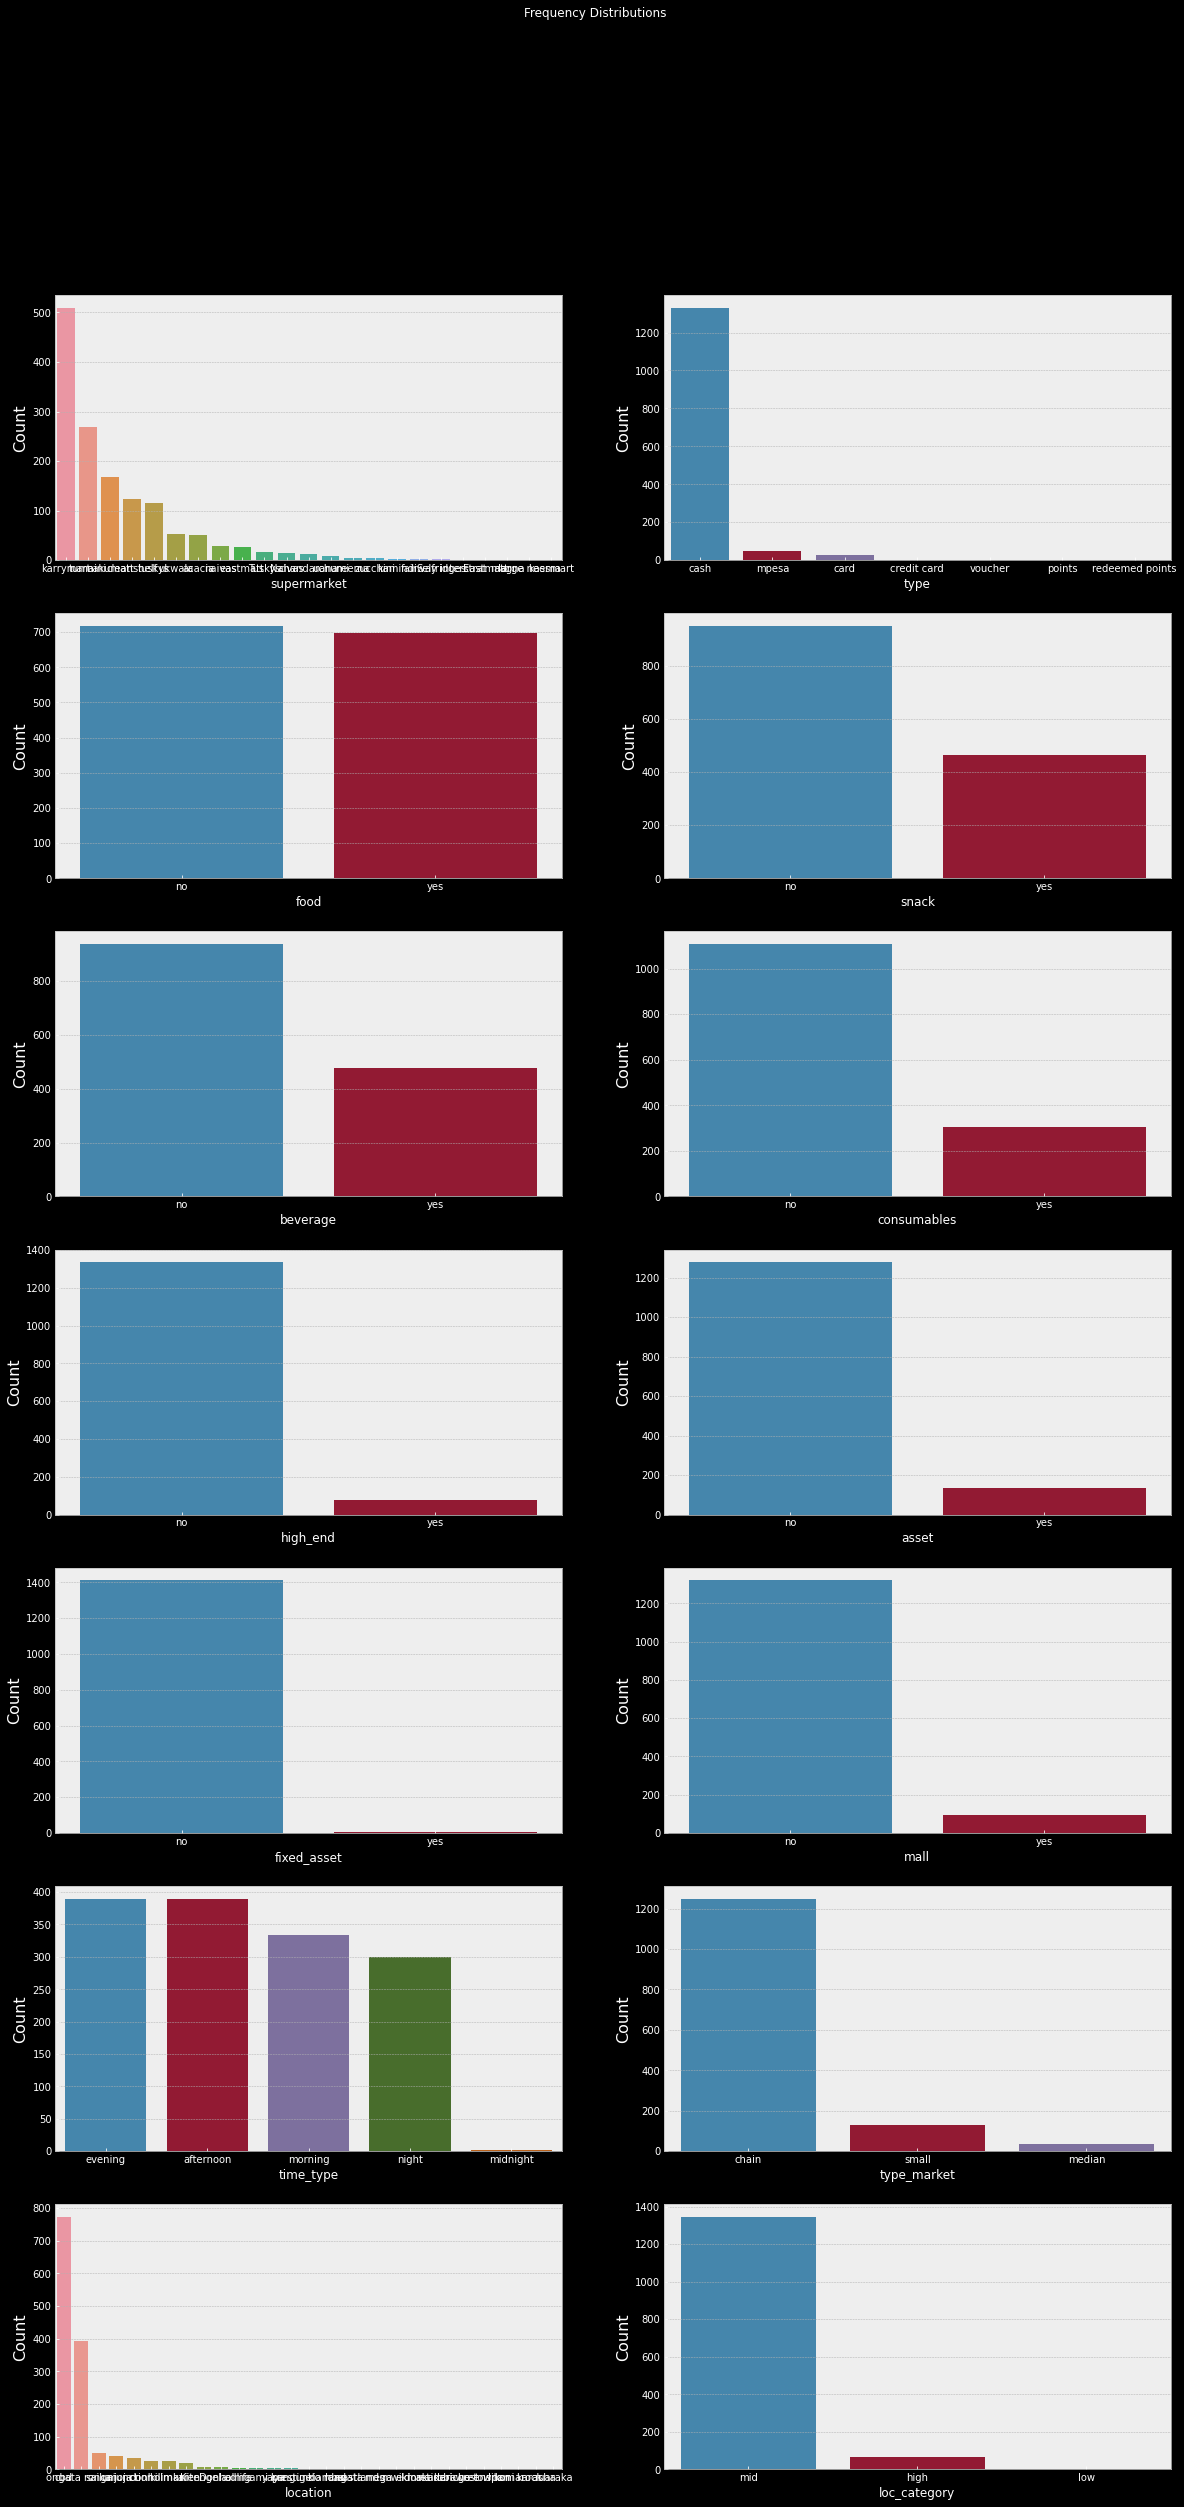

In [0]:
# Plotting sublots for our categorical variables.
#
fig, (ax) = plt.subplots(7,2, figsize=(20, 40))
fig.suptitle('Frequency Distributions')
ax = ax.flatten()

#iterating our columns as we plot
for i, col in enumerate(n_categorical):
    sns.barplot(n_categorical[col].value_counts().keys(), n_categorical[col].value_counts(), ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count', fontsize=16)
      
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


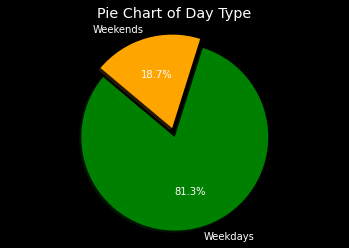

In [0]:
#plotting our frequencies on pie charts to visualise our percentage distributions
#
labels = ['Weekdays', 'Weekends']
sizes  = [supermarket_df['day_type'].value_counts()]
colors = ['green','orange']

# Highlights a particular Value in plot
explode = (0.1, 0)  

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Day Type')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


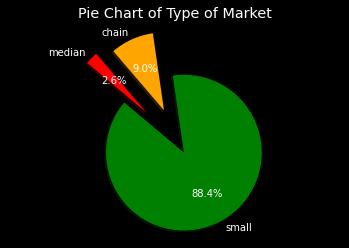

In [0]:
#plotting our frequencies on pie charts to visualise our percentage distributions
#
labels = ['small', 'chain', 'median']
sizes  = [supermarket_df['type_market'].value_counts()]
colors = ['green','orange','red']

# Highlights a particular Value in plot
explode = (0.1, 0.5, 0.6)  

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Type of Market')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


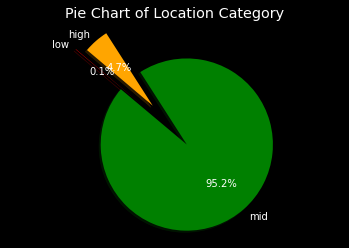

In [0]:
#plotting our frequencies on pie charts to visualise our percentage distributions
#
labels = ['mid', 'high', 'low']
sizes  = [supermarket_df['loc_category'].value_counts()]
colors = ['green','orange','red']

# Highlights a particular Value in plot
explode = (0.1, 0.5, 0.6)  

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Location Category')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


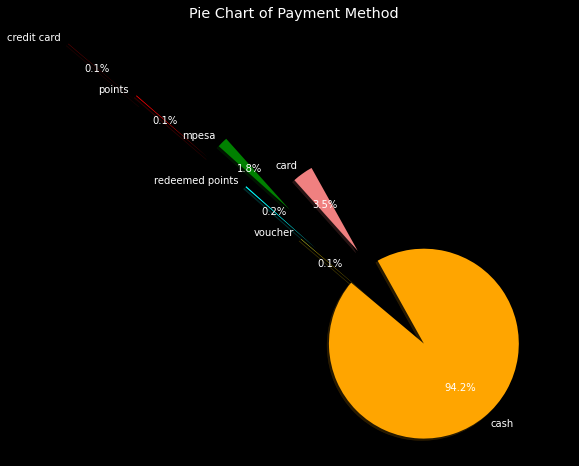

In [0]:
#plotting our frequencies on pie charts to visualise our percentage distributions
#

labels = ['cash', 'card', 'mpesa', 'redeemed points', 'points',
       'voucher', 'credit card']
sizes  = [supermarket_df['type'].value_counts()]
colors = ['orange','lightcoral', 'green', 'aqua', 'red', 'gold', 'maroon']

# Highlights a particular Value in plot
explode = (0, 1.2, 2.0, 1.5, 3.0, 0.7, 3.9)  
fig = plt.figure(figsize=(10,8))

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Payment Method')
plt.show()

In [0]:
# Describing our numeric variables
#
numerical_df.describe()

,no_of_items,variation,total,paid,change
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,2.298819,1.394719,309.774260,466.952543,163.810028
std,2.610760,0.726892,926.393131,953.964841,257.367923
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,60.000000,100.000000,5.000000
50%,1.000000,1.000000,110.000000,200.000000,40.000000
75%,3.000000,2.000000,245.000000,500.000000,182.500000
max,33.000000,6.000000,17350.000000,17350.000000,1880.000000


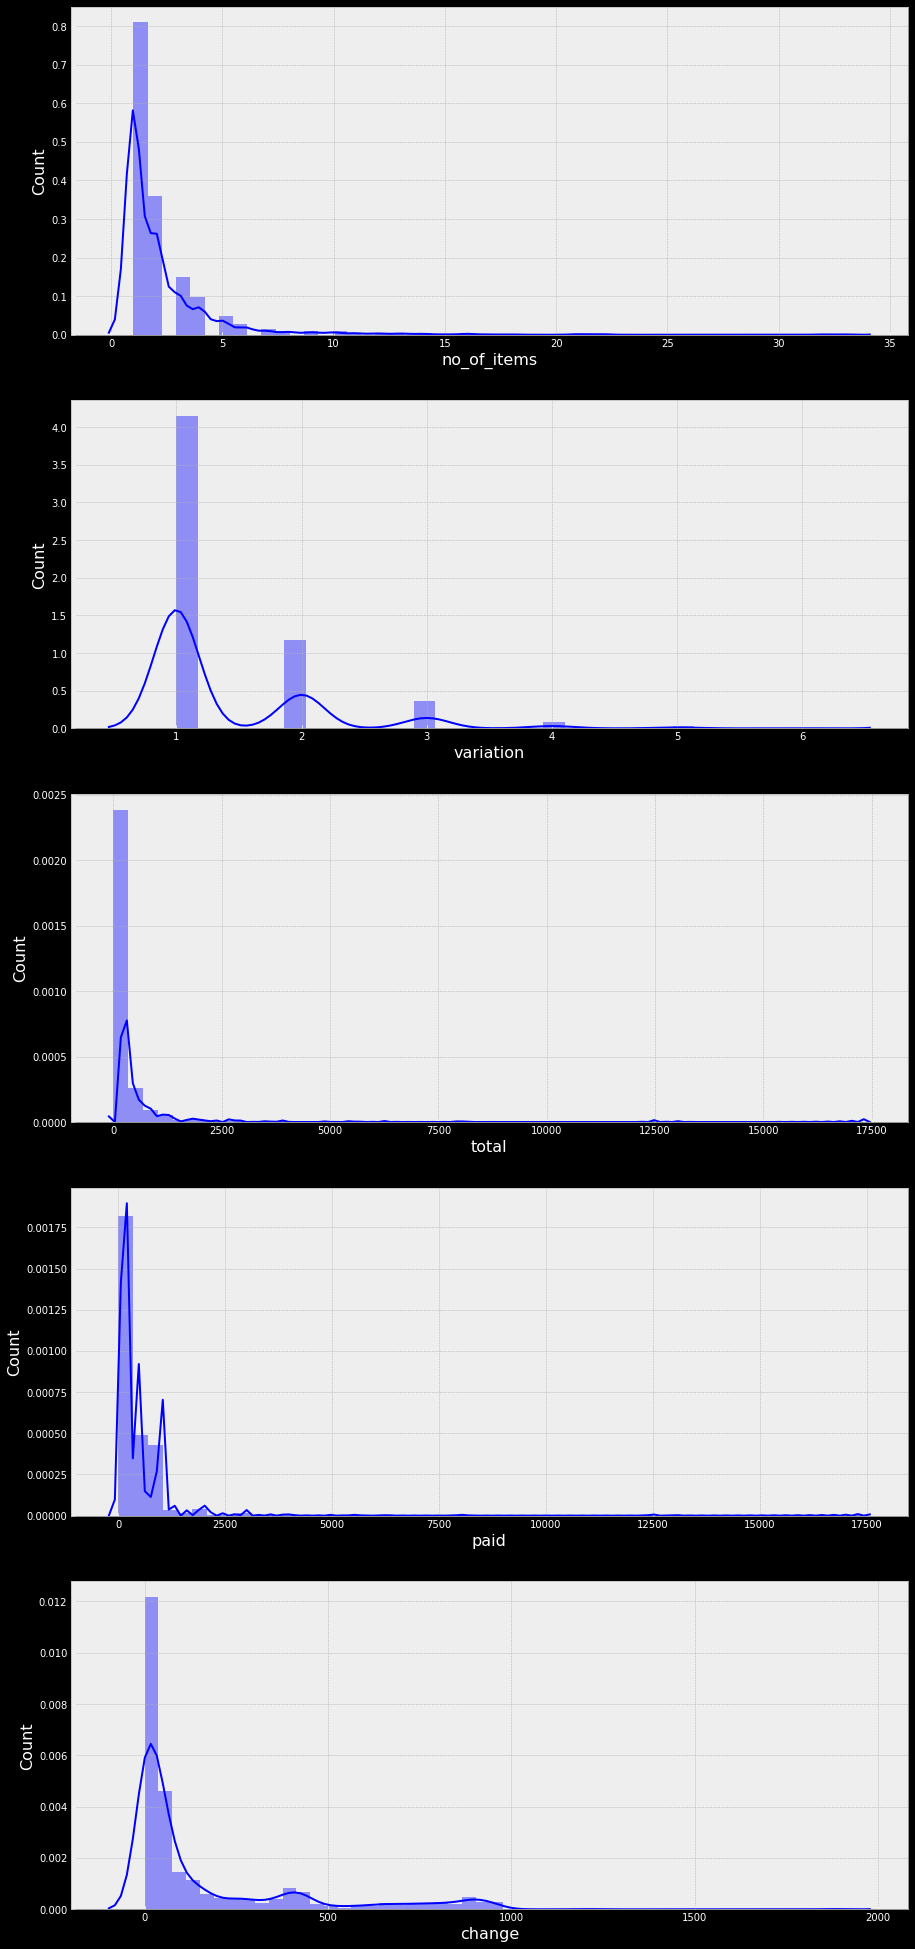

In [0]:
# Frequency distribution for our numeric variables
#
fig, ax = plt.subplots(len(numerical_df.columns), figsize=(15,35))

for i, col_val in enumerate(numerical_df):
  sns.distplot(numerical_df[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

> #### Conclusion

>> * Our numerical variable columns have data that is normally distributed and the data tends to be skewed toward the right side near the zero mark.

> ## ii) Bivariate Analysis

> ## Data Correlation

> ### a) Numeric and Numeric Variables

>  #### Plotting Scatter plots

In [0]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1463
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no_of_items  1439 non-null   int64  
 1   variation    1439 non-null   int64  
 2   total        1439 non-null   float64
 3   paid         1439 non-null   float64
 4   change       1439 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.5 KB


Text(0.5, 1.0, 'Pairplot of Numeric variables.')

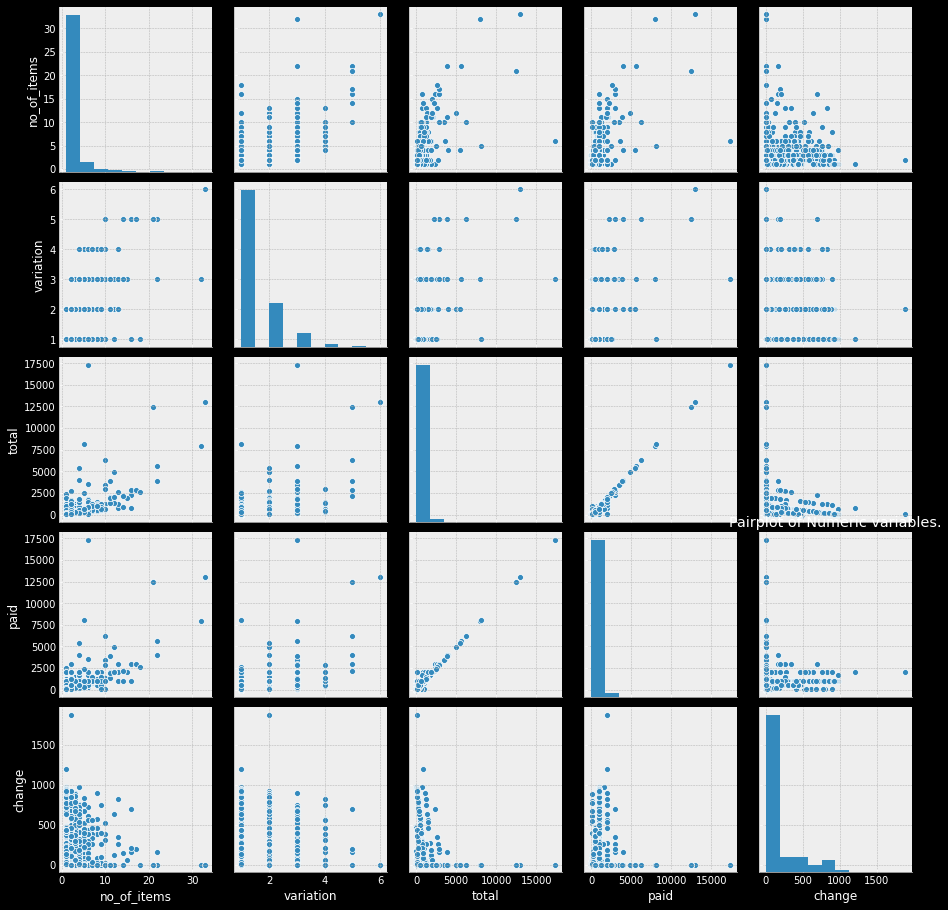

In [0]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(numerical_df)
plt.title("Pairplot of Numeric variables.")

> #### Plotting a heatmap of our data

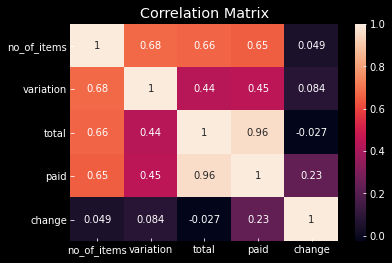

In [0]:
# Plotting heatmap to show how our numeric variables correlate
sns.heatmap(numerical_df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

>> Observations
> * We observe that the total amount is closely related to the paid amount.
> * The Variation is closely related to the toal and paid amount while the change is not related at all to the total.

> #### Calculating Correlations of Numeric Variables.

In [0]:
numerical_df.columns

Index(['no_of_items', 'variation', 'total', 'paid', 'change'], dtype='object')

In [0]:
# Calculating the correlations of the numeric variables 
pearson_coeff = numerical_df['no_of_items'].corr(numerical_df['variation'], method="pearson")
print(f"Correlation between Number of items and variation is {pearson_coeff}")

pearson_coeff = numerical_df['variation'].corr(numerical_df['total'], method="pearson")
print(f"Correlation between variation and total is {pearson_coeff}")

pearson_coeff = numerical_df['total'].corr(numerical_df['paid'], method="pearson")
print(f"Correlation between total and paid is {pearson_coeff}")

pearson_coeff = numerical_df['paid'].corr(numerical_df['change'], method="pearson")
print(f"Correlation between paid and change is {pearson_coeff}")

pearson_coeff = numerical_df['total'].corr(numerical_df['no_of_items'], method="pearson")
print(f"Correlation between total and number of items is {pearson_coeff}")

pearson_coeff = numerical_df['paid'].corr(numerical_df['variation'], method="pearson")
print(f"Correlation between paid and variation is {pearson_coeff}")

Correlation between Number of items and variation is 0.6754498995627983
Correlation between variation and total is 0.43758487014723774
Correlation between total and paid is 0.9625394600099774
Correlation between paid and change is 0.23206015506103378
Correlation between total and number of items is 0.6630759105868743
Correlation between paid and variation is 0.44818031934110486


> ## ii) Multivariate Analysis

#### 1) Discriminant Analysis

In [0]:
# Getting the first 5 rows
#
supermarket_df.head()

,Unnamed: 0,no_of_items,variation,total,paid,change,supermarket,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,0,1,1,90.0,100.0,10.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
1,1,1,1,90.0,500.0,410.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
2,2,3,1,270.0,300.0,30.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
3,3,3,1,137.0,200.0,63.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
4,4,1,1,75.0,80.0,5.0,acacia,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0


In [0]:
# getting information from our suprmarket dataframe
#
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1438
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1414 non-null   int64  
 1   no_of_items   1414 non-null   int64  
 2   variation     1414 non-null   int64  
 3   total         1414 non-null   float64
 4   paid          1414 non-null   float64
 5   change        1414 non-null   float64
 6   supermarket   1414 non-null   object 
 7   type          1414 non-null   object 
 8   food          1414 non-null   object 
 9   snack         1414 non-null   object 
 10  beverage      1414 non-null   object 
 11  consumables   1414 non-null   object 
 12  high_end      1414 non-null   object 
 13  asset         1414 non-null   object 
 14  fixed_asset   1414 non-null   object 
 15  date          1414 non-null   object 
 16  mall          1414 non-null   object 
 17  time          1414 non-null   object 
 18  time_type     1414 non-null 

In [0]:
# Converting the object columns to int columns
#
converted = {'food':{'yes':1,"no":0},'snack':{'yes':1,'no':0},'beverage':{'yes':1,'no':0},'consumables':{'yes':1,'no':0},'high_end':{'yes':1,'no':0},'asset':{'yes':1,'no':0},'fixed_asset':{'yes':1,'no':0}}
supermarket_df.replace(converted, inplace=True)
supermarket_df.head()

,Unnamed: 0,no_of_items,variation,total,paid,change,supermarket,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,0,1,1,90.0,100.0,10.0,acacia,cash,1,0,0,0,0,0,0,20/05/2017,no,19:33:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
1,1,1,1,90.0,500.0,410.0,acacia,cash,1,0,0,0,0,0,0,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
2,2,3,1,270.0,300.0,30.0,acacia,cash,1,0,0,0,0,0,0,20/05/2017,no,19:16:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
3,3,3,1,137.0,200.0,63.0,acacia,cash,1,0,0,0,0,0,0,20/05/2017,no,19:12:00,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0
4,4,1,1,75.0,80.0,5.0,acacia,cash,1,0,0,0,0,0,0,20/05/2017,no,18:31:00,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0


In [0]:
# Loading our dataset with the features and the label column
#
super_df = supermarket_df[['no_of_items',	'variation',	'total',	'paid',	'change',	'food',	'snack',	'beverage',	'consumables',	'high_end',	'asset',	'fixed_asset']]

super_df['day_type'] = supermarket_df['day_type']

super_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,no_of_items,variation,total,paid,change,food,snack,beverage,consumables,high_end,asset,fixed_asset,day_type
0,1,1,90.0,100.0,10.0,1,0,0,0,0,0,0,weekend
1,1,1,90.0,500.0,410.0,1,0,0,0,0,0,0,weekend
2,3,1,270.0,300.0,30.0,1,0,0,0,0,0,0,weekend
3,3,1,137.0,200.0,63.0,1,0,0,0,0,0,0,weekend
4,1,1,75.0,80.0,5.0,1,0,0,0,0,0,0,weekend


In [0]:
super_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# The following code divides data into labels and feature set. 
#

X = super_df.iloc[:, 0:12].values
y = super_df.iloc[:, 12].values

In [0]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Peforming LDA
# -----
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Predicted values are: {y_pred}")

Predicted values are: ['weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'wee

In [0]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix is \n {cm}")
print('Accuracy score is: ' + str(accuracy_score(y_test, y_pred)))

Confusion matrix is 
 [[221   0]
 [ 62   0]]
Accuracy score is: 0.7809187279151943


# 5). Hypothesis Testing

>> ### Define our Hypothesis
> * Ho : Total mean on Weekdays > Total mean on Weekends
> * Ha : Total mean on weekdays <= Total mean on Weekends
> * Level of Significance = 0.05


In [0]:
pip install researchpy

In [0]:
import statsmodels.api as sm
from sklearn.preprocessing import scale
from scipy import stats

In [0]:

# Viewing the first five rows of our dataframe.
#
super_df.head()

,no_of_items,variation,total,paid,change,food,snack,beverage,consumables,high_end,asset,fixed_asset,day_type
0,1,1,90.0,100.0,10.0,1,0,0,0,0,0,0,weekend
1,1,1,90.0,500.0,410.0,1,0,0,0,0,0,0,weekend
2,3,1,270.0,300.0,30.0,1,0,0,0,0,0,0,weekend
3,3,1,137.0,200.0,63.0,1,0,0,0,0,0,0,weekend
4,1,1,75.0,80.0,5.0,1,0,0,0,0,0,0,weekend


In [0]:
# Calculate the sum of the weekday total and weekend total
#
super_df.groupby(['day_type'])['total'].sum().sort_values(ascending=False)


day_type
weekday    360771.11
weekend     82204.05
Name: total, dtype: float64

In [0]:
# Creating two dataframes one for Weekdays and the other for Weekends
#
weekdays = super_df[super_df['day_type'] == 'weekday']
weekends = super_df[super_df['day_type'] == 'weekend']

# Getting the total for both the weekend and weekdays day types
total_weekdays = weekdays['total']
total_weekends = weekends['total']

# Getting the length of our two day types
print(f"total_weekdays: {len(total_weekdays)}")
print(f"total_weekends: {len(total_weekends)}")

total_weekdays: 1149
total_weekends: 265


In [0]:
# check for null values
#
super_df.isnull().sum()

no_of_items    0
variation      0
total          0
paid           0
change         0
food           0
snack          0
beverage       0
consumables    0
high_end       0
asset          0
fixed_asset    0
day_type       0
dtype: int64

In [0]:
# Grouping by day type then getting the description of the data
#
super_df.groupby(['day_type'])['total'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,1149.0,313.987041,1016.788604,1.0,60.0,100.0,220.0,17350.0
weekend,265.0,310.203962,417.573077,5.0,90.0,170.0,347.0,2903.0


> * The null hypothesis is: H0: μ 1 = μ 2
> * The alternative Hypothesis is: Ha: μ 1 ≠ μ 2


In [0]:
# Cretating 2 samples one for Weekdays and the other for weekends.
#
sample_1 = super_df[super_df['day_type'] == 'weekday']
sample_2 = super_df[super_df['day_type'] == 'weekend']

# Checking for the shape of the files 
#
print(sample_1.shape, sample_2.shape)

(1149, 13) (265, 13)


In [0]:
# Make equal number of records in each sample
#
s1 = int(265*0.1)

sample_1 = sample_1.sample(s1, replace=True)
sample_2 = sample_2.sample(s1, replace=True)

print(sample_1.shape, sample_2.shape)

(26, 13) (26, 13)


In [0]:
#Levene's test to check whether the variances of the two group are same. 
#H0 : Variances are same. 
#H1 : Variances are not same. 
#Alpha = 0.05% 
#if p-value > alpha (Cannot reject H0) 
#if p-value < alpha (Accept null hypothesis)
#

alpha = 0.05

stats, p_value = stats.levene(sample_1['total'], sample_2['total'])
print(f" Test statistics: {stats}\n Alpha: {alpha}\n P-value: {p_value}\n ---- ----")
print("\n -------------------------------------\n")
if p_value > alpha:
  print(" Variances are the same.\n We accept Null Hypothesis.")
else: 
  print(" Variances are not the same.\n We reject the Null Hypothesis")

 Test statistics: 2.1434767623116846
 Alpha: 0.05
 P-value: 0.14943631057545964
 ---- ----

 -------------------------------------

 Variances are the same.
 We accept Null Hypothesis.


In [0]:
from scipy.stats import norm

In [0]:
# Confidence level for Weekdays

#standard error
std_error = sample_1['total'].std()/np.sqrt(265)
print(f"the std_error is: {std_error}")

# Calculating the confidence interval
#
norm.interval(0.95, loc=sample_1['total'].mean(), scale=std_error)

# We can be cetain that the population mean data is between 250.597 and 445.18

the std_error is: 16.004917241495242


(181.8617078618944, 244.59983059964406)

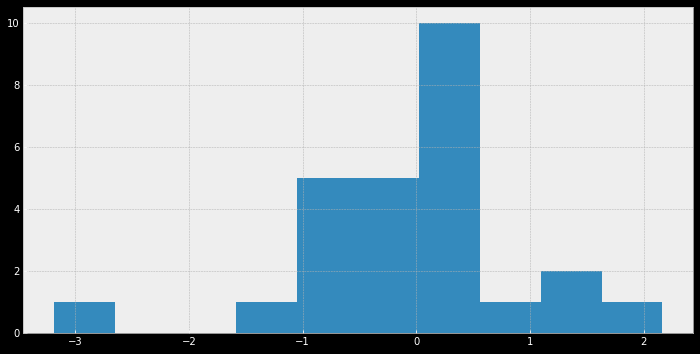

In [0]:
#we will take the difference b/w sample_01 and sample_02 and plot a histogram to check for normality 
#we will scale the difference 
diff = scale((np.array(sample_1['total']) - np.array(sample_2['total']))) 
plt.figure(figsize=(12,6)) 
plt.hist(diff) 
plt.show()

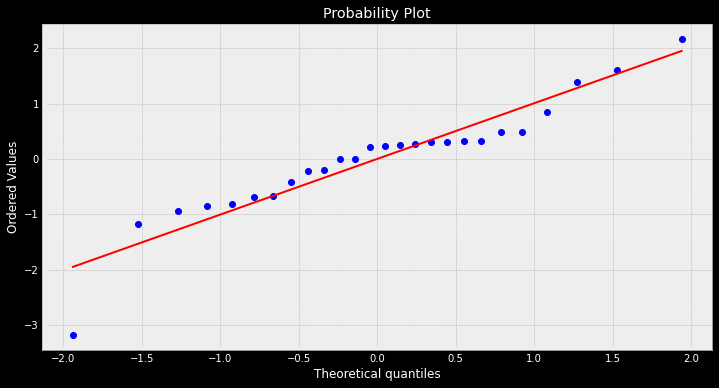

In [0]:
# Plotting a q-q plot to check the normality of our data.
#
import numpy as np 
import pylab 
import scipy.stats as stats

plt.figure(figsize=(12,6))
stats.probplot(diff, dist="norm", plot=pylab)
plt.show()

> * We can see that our data is normally distributed.

# 6). Bayes theorem

In [0]:
# Viewing our dataset.
#
super_df.head()

,no_of_items,variation,total,paid,change,food,snack,beverage,consumables,high_end,asset,fixed_asset,day_type
0,1,1,90.0,100.0,10.0,1,0,0,0,0,0,0,weekend
1,1,1,90.0,500.0,410.0,1,0,0,0,0,0,0,weekend
2,3,1,270.0,300.0,30.0,1,0,0,0,0,0,0,weekend
3,3,1,137.0,200.0,63.0,1,0,0,0,0,0,0,weekend
4,1,1,75.0,80.0,5.0,1,0,0,0,0,0,0,weekend


In [0]:
super_df.columns

Index(['no_of_items', 'variation', 'total', 'paid', 'change', 'food', 'snack',
       'beverage', 'consumables', 'high_end', 'asset', 'fixed_asset',
       'day_type'],
      dtype='object')

In [0]:
# Feature extraction .
#
numeric_df = super_df[['no_of_items', 'variation', 'total', 'paid', 'change', 'food', 'snack',\
                       'beverage', 'consumables', 'high_end', 'asset', 'fixed_asset']]

X = numeric_df
y = super_df['day_type']
y.shape[0]

1414

In [0]:
# Splitting our data into training and test sets:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)


In [0]:
# Using the GaussianNB classifier (i.e. from sklearn.naive_bayes import GaussianNB) 
# Training the model
#
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

# Making the prediction:
#
y_pred = model.predict(X_test)
print(f"Predicted Day type is: {y_pred}")

Predicted Day type is: ['weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekend' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekend' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekend' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekend' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekend' 'weekday' 'weekday' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekend' 'weekday' 'weekday' 'weekday'
 'weekday' 'weekday' 'weekday' 'weekday' 'weekday' 'we

In [0]:
# calculating the Acurracy of our model.
#
from sklearn import metrics

# Model Accuracy implies how often is the classifier correct?
print(" Accuracy: ", metrics.accuracy_score(y_test, y_pred))

 Accuracy:  0.7994350282485876
